In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as p
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import colors



from itertools import combinations
import scipy
from scipy.ndimage.filters import gaussian_filter1d
import sys
import os
import copy
atish_assay_path = 'fitness_assay_grantedits.py'
sys.path.append(os.path.dirname(os.path.expanduser(atish_assay_path)))
import fitness_assay_grantedits as atish

tools_path = '../code/tools.py'
sys.path.append(os.path.dirname(os.path.expanduser(tools_path)))
import tools

sns.set_style('white')
sns.set_style('ticks')
sns.set_color_codes()

In [8]:
name = 'noF_DoubleBC_merged+flaskswapcorrected_041819' 

merged_data = p.read_csv(f'../data/BarcodeCounts_{name}_withBCinfo.csv')

data = p.read_csv('../data/BarcodeCounts_noF_DoubleBC_041819_withBCinfo.csv')

data = data[~data['barcode'].isin([486239,7777777,9999999])]

In [5]:
cycles_22 = ['A0-DE2-PCRa',
'A4-DE1-PCRb',
'B2-DE1-PCRc',
'C0-DE1-PCRc',
'D1-DE1-PCRb',
'E0-DE2-PCRa',
'E4-DE1-PCRb',
'F3-DE1-PCRb',
'A1-DE1-PCRb',
'B3-DE1-PCRc',
'C2-DE3-PCRb',
'D2-DE1-PCRb',
'E1-DE2-PCRa',
'F0-DE2-PCRa',
'F4-DE1-PCRb',
'Tneg-DE3-PCRa',
'A2-DE1-PCRb',
'B1-DE2-PCRa',
'B4-DE5-PCRa',
'C2-DE3-PCRa',
'C3-DE2-PCRa',
'D3-DE1-PCRb',
'E2-DE1-PCRb',
'F1-DE1-PCRb',
'A3-DE1-PCRb',
'C1-DE1-PCRc',
'C4-DE3-PCRa',
'C4-DE3-PCRb',
'D0-DE2-PCRa',
'D4-DE1-PCRb',
'E3-DE1-PCRb',
'F2-DE1-PCRb']

,D0-DE1-PCRb,Z4-DE2-PCRa,AA2-DE1-PCRa,13-1-2,18-1-2,C0-DE1-PCRa,G3-DE1-PCRa,20-1-2,21-1-2,23-1-2,...,F4-DE1-PCRa,P4-DE1-PCRa,Z4-DE1-PCRa,B1-DE2-PCRa,barcode,gene,type,ploidy,class,additional_muts
0,709,62,3435,700,133,390,249,2336,760,2406,...,161,1828,66,2298,53,Diploid,Diploid,Diploid,Diploid,TIP1-upstream_point_variant; YKR012C-upstream_...
1,6305,88658,289984,54385,14132,5042,25061,14656,11899,21698,...,23369,46,95528,53626,151,IRA1,stop_gained,Haploid,PKA,SEH1-missense_variant; ZIP1-missense_variant; ...
2,602,54,2587,2977,681,264,195,2189,437,1867,...,112,1497,57,1741,262,NotSequenced,NotSequenced,NotSequenced,NotSequenced,NotSequenced
3,3258,12861,66414,32361,9166,2230,5785,4669,2997,8379,...,9759,54,13589,17970,273,IRA1,frameshift_variant,Haploid,PKA,None
4,1589,3339,27372,23483,6048,998,1956,9021,4184,13978,...,6063,284,3420,9194,323,NotSequenced,NotSequenced,NotSequenced,NotSequenced,NotSequenced
5,1625,17268,117619,4386,824,1641,9142,6629,2080,12693,...,2619,12,19546,15652,415,IRA1,frameshift_variant,Haploid,PKA,None
6,0,0,0,3792,798,0,0,3,0,0,...,0,0,0,0,499,NotSequenced,NotSequenced,NotSequenced,NotSequenced,NotSequenced
7,493,38,2507,57,10,226,172,1776,449,1665,...,108,1311,43,1452,622,NotSequenced,NotSequenced,NotSequenced,NotSequenced,NotSequenced
8,442,6926,35191,7846,1262,449,2899,2479,2159,2872,...,823,7,7829,4413,689,IRA1,frameshift_variant,Haploid,PKA,RPL19A-upstream_point_variant
9,504,41,2831,1094,186,297,174,2819,895,2788,...,118,1571,55,1461,697,NotSequenced,NotSequenced,NotSequenced,NotSequenced,NotSequenced


In [6]:
cycles_22 = ["A0.DE2.PCRa","A4.DE1.PCRb","B2.DE1.PCRc","C0.DE1.PCRc","D1.DE1.PCRb","E0.DE2.PCRa","E4.DE1.PCRb","F3.DE1.PCRb","A1.DE1.PCRb","B3.DE1.PCRc","D2.DE1.PCRb","E1.DE2.PCRa","F0.DE2.PCRa","F4.DE1.PCRb","Tneg.DE3.PCRa","A2.DE1.PCRb","B1.DE2.PCRa","B4.DE5.PCRa","C2.DE3.PCRa","C3.DE2.PCRa","D3.DE1.PCRb","E2.DE1.PCRb","F1.DE1.PCRb","A3.DE1.PCRb","C1.DE1.PCRc","C4.DE3.PCRa","D0.DE2.PCRa","D4.DE1.PCRb","E3.DE1.PCRb","F2.DE1.PCRb"]

In [7]:
len(cycles_22)

30

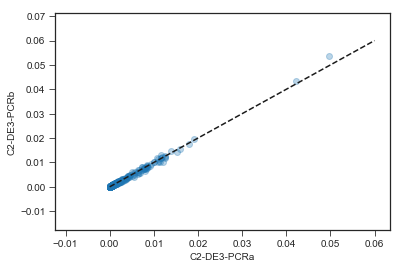

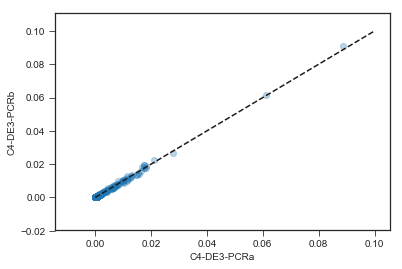

In [17]:
plt.scatter(data['C2-DE3-PCRa'].values/np.nansum(data['C2-DE3-PCRa'].values),
            data['C2-DE3-PCRb'].values/np.nansum(data['C2-DE3-PCRb'].values),alpha=0.3)
plt.xlabel('C2-DE3-PCRa')
plt.ylabel('C2-DE3-PCRb')

plt.plot([0,0.06],[0,0.06],'k--')
plt.savefig('bubble_C2.png',bbox_inches='tight')

plt.figure()

plt.scatter(data['C4-DE3-PCRa'].values/np.nansum(data['C4-DE3-PCRa'].values),
            data['C4-DE3-PCRb'].values/np.nansum(data['C4-DE3-PCRb'].values),alpha=0.3)
plt.xlabel('C4-DE3-PCRa')
plt.ylabel('C4-DE3-PCRb')
plt.plot([0,0.1],[0,0.1],'k--')
plt.savefig('bubble_C4.png',bbox_inches='tight')

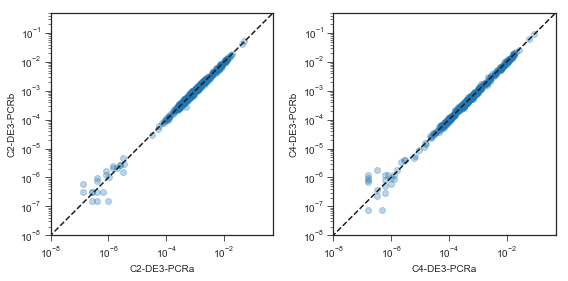

In [32]:

plt.figure(figsize=(8,4))
plt.subplot(121)

plt.scatter(data['C2-DE3-PCRa'].values/np.nansum(data['C2-DE3-PCRa'].values),
            data['C2-DE3-PCRb'].values/np.nansum(data['C2-DE3-PCRb'].values),alpha=0.3)
plt.xlabel('C2-DE3-PCRa')
plt.ylabel('C2-DE3-PCRb')
plt.xscale('log')
plt.yscale('log')
plt.xlim(10**-8,0.5)
plt.ylim(10**-8,0.5)
plt.plot([0,1.0],[0,1.0],'k--')
plt.gca().set_aspect('equal')
# plt.savefig('bubble_C2_log.png',bbox_inches='tight')

plt.subplot(122)

plt.scatter(data['C4-DE3-PCRa'].values/np.nansum(data['C4-DE3-PCRa'].values),
            data['C4-DE3-PCRb'].values/np.nansum(data['C4-DE3-PCRb'].values),alpha=0.3)
plt.xlabel('C4-DE3-PCRa')
plt.ylabel('C4-DE3-PCRb')
plt.plot([0,1.0],[0,1.0],'k--')
plt.xscale('log')
plt.yscale('log')
plt.xlim(10**-8,0.5)
plt.ylim(10**-8,0.5)
plt.gca().set_aspect('equal')
plt.tight_layout()
# plt.savefig('bubble_C4_log.png',bbox_inches='tight')
